<a href="https://colab.research.google.com/github/NID123-CH/DSR-40/blob/main/DSR_40_Decision_Tree(_Breast_Cancer)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Breast Cancer dataset**, which records clinical measurements of breast cancer tumors.

Each tumor is labeled as **“benign” (for harmless tumors) or “malignant” (for cancerous tumors), **and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
from google.colab import files
files.upload()

Saving breast-cancer.csv to breast-cancer (3).csv


{'breast-cancer (3).csv': b'id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst\n842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189\n842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902\n84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.0

In [82]:
cancer = pd.read_csv('breast-cancer.csv')
print(cancer.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [83]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
print("dimension of diabetes data: {}".format(cancer.shape))

dimension of diabetes data: (569, 32)


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [41]:
print("Shape of cancer data: {}".format(cancer.shape))

Shape of cancer data: (569, 32)


In [84]:
cancer.drop(['id'], axis = 1, inplace = True) #drop the old column from the dataset
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [85]:
X = cancer.drop('diagnosis',axis=1)
y = cancer['diagnosis']

In [90]:
from sklearn.preprocessing import LabelEncoder
#creating the object
lb = LabelEncoder()
y = lb.fit_transform(y)

### Decision Tree

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
##train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [111]:
(X_train.shape,y_train.shape)

((455, 30), (455,))

In [112]:
print(X_train)

[[0.06552721 0.25769361 0.07732252 ... 0.60137457 0.52493594 0.52950153]
 [0.65620256 0.57017247 0.67420686 ... 0.9975945  0.49931007 0.62190573]
 [0.07257946 0.14034494 0.08023901 ... 0.174811   0.33845851 0.25313666]
 ...
 [0.32317939 0.2404464  0.30146536 ... 0.11453608 0.17602996 0.05222109]
 [0.30799745 0.33513696 0.30729834 ... 0.62783505 0.31815494 0.42777213]
 [0.21984426 0.36557322 0.20842225 ... 0.25536082 0.22255076 0.11648016]]


In [113]:



#initialize the decisiontreeclassifier
tree = DecisionTreeClassifier( max_depth=5,random_state=42,criterion='entropy')
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.947


In [114]:
y_pred = tree.predict(X_test)

In [115]:
y_pred[:20]

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [116]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[70,  1],
       [ 5, 38]])

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### Feature importance in Decision trees
Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [97]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.60115128 0.         0.         0.         0.00649371
 0.01398841 0.02206138 0.         0.         0.         0.01897979
 0.         0.         0.09480306 0.11249547 0.10756776 0.
 0.         0.         0.         0.02245913 0.         0.        ]


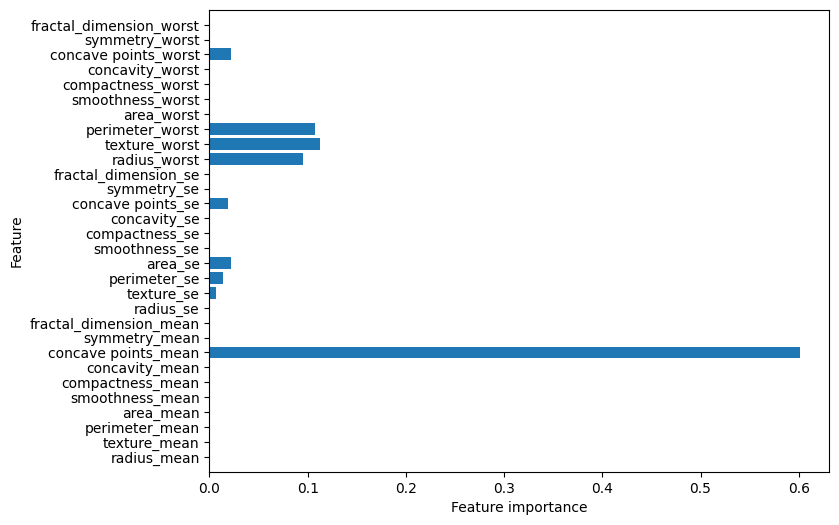

In [ ]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(8,6))
    n_features = 30
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)  #cancer_features
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)
plt.savefig('feature_importance')

We can then visualize the feature importances.

In [118]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=X.columns, impurity=False, filled=True)


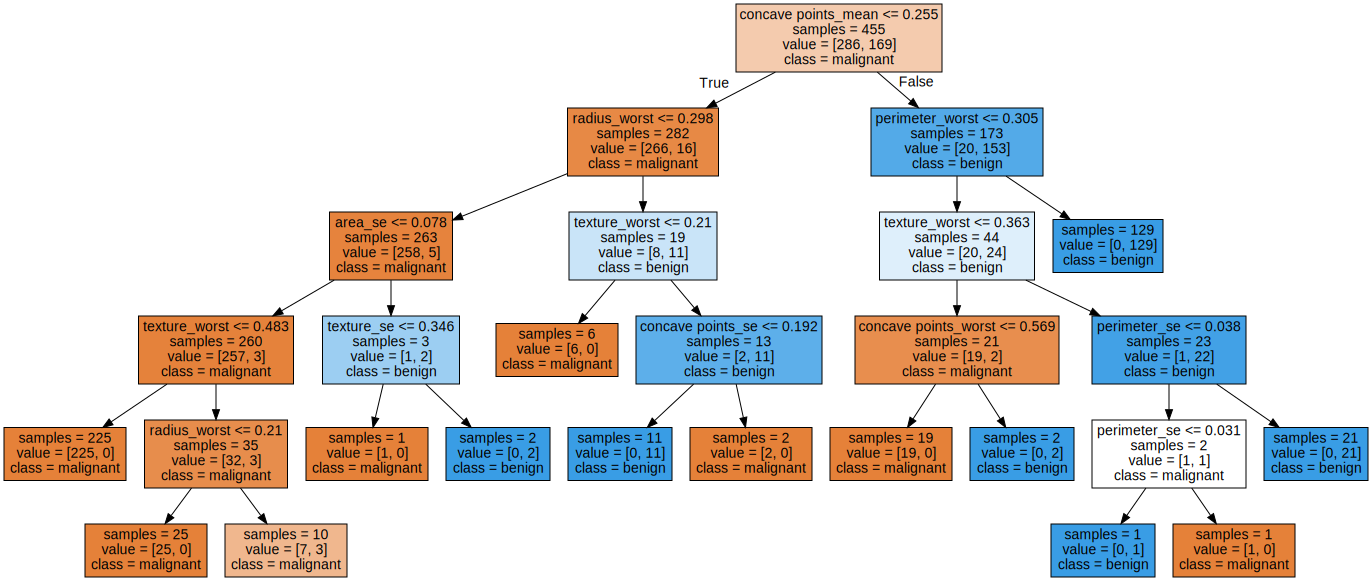

In [119]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


**HYPERPARAMETER TUNING**

In [120]:
dt = DecisionTreeClassifier(random_state=42)

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
# Create the parameter grid based on the results of random search
params = {
    'max_depth': range(1,10),
    'min_samples_leaf': range(1,10),
    'min_samples_split': range(2,10),
    'criterion': ["gini", "entropy"]
}

In [123]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [124]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 1296 candidates, totalling 5184 fits
CPU times: user 2.28 s, sys: 96.5 ms, total: 2.37 s
Wall time: 41.5 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy', verbose=1)

In [75]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007132,0.001068,0.003206,0.000424,gini,1,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.912281,0.894737,0.912281,0.849558,0.892214,0.025648,1153
1,0.005762,0.000289,0.003403,0.000599,gini,1,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.912281,0.894737,0.912281,0.849558,0.892214,0.025648,1153
2,0.006314,0.000532,0.003501,0.000484,gini,1,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.912281,0.894737,0.912281,0.849558,0.892214,0.025648,1153
3,0.006826,0.000548,0.003783,0.000525,gini,1,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.912281,0.894737,0.912281,0.849558,0.892214,0.025648,1153
4,0.006248,0.000266,0.003235,0.000133,gini,1,1,6,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.912281,0.894737,0.912281,0.849558,0.892214,0.025648,1153


In [76]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
943,0.011415,0.000756,0.003279,0.000062,entropy,5,1,9,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.982456,0.921053,0.947368,0.929204,0.94502,0.02362,1
1015,0.013309,0.003543,0.003254,0.000098,entropy,6,1,9,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.982456,0.921053,0.947368,0.929204,0.94502,0.02362,1
1087,0.010845,0.000629,0.003182,0.000135,entropy,7,1,9,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.982456,0.921053,0.947368,0.929204,0.94502,0.02362,1
1159,0.010721,0.000720,0.002802,0.000184,entropy,8,1,9,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.982456,0.921053,0.947368,0.929204,0.94502,0.02362,1
1231,0.020670,0.003781,0.008458,0.003113,entropy,9,1,9,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.982456,0.921053,0.947368,0.929204,0.94502,0.02362,1


In [125]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=9,
                       random_state=42)

In [126]:
dt_best = grid_search.best_estimator_

In [127]:
#  evaluate model

print("Accuracy on training set: {:.3f}".format(dt_best.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt_best.score(X_test, y_test)))
y_pred = dt_best.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy on training set: 0.989
Accuracy on test set: 0.947
[[70  1]
 [ 5 38]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

